### Classifiers:
- 1. Decision Tree
- 2. Random Forest
- 3. Naive Bayes
- 4. Support Vector Machine(SVM)

###  Write a Python Program to apply the following classifiers on the given dataset and find:
- Confusion Matrix
- Accuracy
- Classification Report

## 1. Decision Tree Classifier

In [13]:
# Importing neccessary libraries:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn import metrics

In [14]:
# Reading the data:
Apple_Data = pd.read_csv("apple_quality.csv")

# Displaying the data:
display(Apple_Data)

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good
...,...,...,...,...,...,...,...,...,...
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good
3999,3999.0,0.278540,-1.715505,0.121217,-1.154075,1.266677,-0.776571,1.599796456,good


In [15]:
# Preprocessing the data:
Apple_Data.drop(4000, axis=0, inplace=True)
Apple_Data.drop('A_id', axis=1, inplace=True)
Apple_Data['Quality'].replace('good', 1, inplace=True)
Apple_Data['Quality'].replace('bad', 0, inplace=True)

display(Apple_Data)

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,1
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,1
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,0
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,1
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,1
...,...,...,...,...,...,...,...,...
3995,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784369,0
3996,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,1
3997,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,0
3998,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,1


In [16]:
# Selecting the features and labels:
X = Apple_Data.iloc[:,0:7]
Y = Apple_Data["Quality"]

# Splitting the train data and test data:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, shuffle=False)

In [17]:
# Creating the classifier and predicting the test data:
classifier = tree.DecisionTreeClassifier()
classifier.fit(X_train, Y_train)
print(classifier.predict(X_test))

[0 1 1 1 1 0 0 0 0 0 0 0 1 0 0 1 1 1 1 0 1 1 1 0 1 0 1 1 0 1 1 1 0 0 0 1 0
 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 1 1 0 1 1 0 0 0
 0 1 1 0 1 0 1 1 1 0 1 0 0 1 1 0 0 1 0 0 1 1 1 1 0 0 1 0 1 1 1 1 1 0 1 0 0
 0 0 1 0 0 0 1 1 0 1 0 0 1 0 0 1 1 1 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1
 1 1 0 1 0 1 0 0 0 0 1 0 0 1 1 1 1 0 0 1 0 1 1 0 1 0 0 0 0 1 1 1 1 1 0 1 0
 0 0 1 1 1 1 1 0 1 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 1 0 0 0 0 1 0 1 0 0 1 0 1
 0 0 1 0 1 1 0 0 1 0 0 1 1 1 0 0 1 1 0 0 0 1 1 1 0 1 0 0 0 0 1 1 1 1 0 0 1
 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 1 0 1 1 0 1 1 0
 0 1 0 0 0 0 0 1 0 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 0 0 1 0 1 0 1
 0 1 0 1 1 1 0 0 1 1 1 1 0 1 1 1 0 0 0 0 1 1 1 1 0 1 0 1 1 1 1 0 1 0 1 1 0
 1 0 0 1 0 1 0 1 0 1 0 0 0 1 1 0 1 1 0 1 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0 1 1
 1 1 0 0 0 0 0 1 0 1 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 0
 1 1 0 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 1 1
 0 1 1 0 1 0 0 1 1 0 1 0 

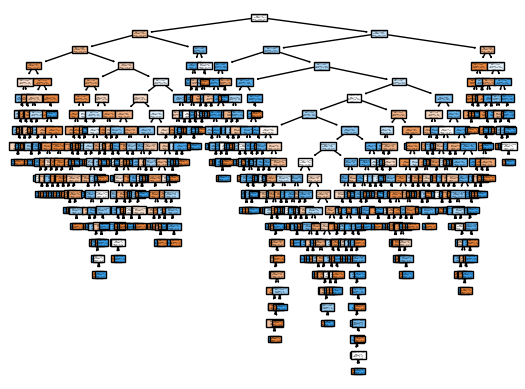

In [18]:
# Displaying the Decision Tree Diagram:
tree.plot_tree(classifier,
               feature_names=['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity'],
               class_names=['good', 'bad'] ,
               filled=True)
plt.show()